## 2178. 미로탐색

- N x M크기의 배열로 표현되는 미로가 있음

- __1__은 <u>이동할 수 있는 칸</u>, __0__은 <u>이동할 수 없는 칸</u>을 나타냄<br>
🐾 __Q.__ 이러한 미로가 주어졌을 때, (1, 1)에서 출발하여 (M, N)의 위치로 이동할 때 지나야 하는 __최소의 칸 수__를 구하는 프로그램을 작성하기
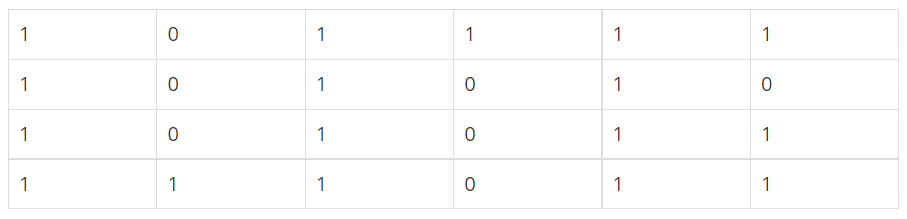


- 입력
  - 첫째 줄에 두 정수 N, M(2 ≤ N, M ≤ 100)이 주어짐
  - 다음 N개의 줄에는 M개의 정수로 미로가 주어짐
  - 각각의 수들은 __붙어서__ 입력으로 주어짐

- 출력
  - 첫째 줄에 지나야하는 최소의 칸 수를 출력함
  - 항상 도착위치로 이동할 수 있는 경우만 입력으로 주어짐

In [ ]:
'''
4 6
101111
101010
101011
111011
'''

- 항상 좌표 (0, 0)부터 시작
- 좌표에서 1인 곳을 지나가면 0으로 바꾸어 주면서 1씩 카운트하니 1인 곳을 모두 카운트 되어 안됨


In [ ]:
# 틀림
from collections import deque

N, M = map(int, input().split())

graph = [list(map(int, input())) for _ in range(N)]

def bfs(graph, a, b):
  # 상하좌우 이동
  dx = [-1, 1, 0, 0]
  dy = [0, 0, -1, 1]


  queue = deque()
  queue.append((a, b))
  graph[a][b] = 0
  count = 1 # graph에서 1인 곳으로 좌표 이동할 때마다 세주기

  while queue:
    x, y = queue.popleft()

    for i in range(4):
      nx = x + dx[i]
      ny = y + dy[i]
      if nx < 0 or nx >= N or ny < 0 or ny >= M:
        continue

      if graph[nx][ny] == 0:
        continue

      if graph[nx][ny] == 1:
        graph[nx][ny] = 0
        queue.append((nx, ny))
        count += 1
  
  return count
ans = []

for i in range(N):
  for j in range(M):
    if graph[i][j] == 1:
      ans.append(bfs(graph, i, j))

print(ans[-1])
    

4 6
101111
101010
101011
111011
[17]


In [1]:
# 다시 풀음, 다른 코드를 참고
from collections import deque

N, M = map(int, input().split())

graph = [list(map(int, input())) for _ in range(N)]

def bfs(graph, x, y):
  # 상하좌우 이동
  dx = [-1, 1, 0, 0]
  dy = [0, 0, -1, 1]


  queue = deque()
  queue.append((x, y))

  
  while queue: #queue가 빌 때 까지 반복함
    x, y = queue.popleft()

    for i in range(4): #상하좌우 4방향 확인
      nx = x + dx[i]
      ny = y + dy[i]
      if nx < 0 or nx >= N or ny < 0 or ny >= M:  # 0 <= nx < N, 0 <= ny < M 범위를 벗어나면 탐색 멈춤
        continue

      if graph[nx][ny] == 1:
        graph[nx][ny] = graph[x][y] + 1
        queue.append((nx, ny))
        
  
  return graph[N - 1][M - 1]  # 도착할 칸의 최소값

print(bfs(graph, 0, 0))

4 6
101111
101010
101011
111011
15


In [2]:
graph

[[3, 0, 9, 10, 11, 12],
 [2, 0, 8, 0, 12, 0],
 [3, 0, 7, 0, 13, 14],
 [4, 5, 6, 0, 14, 15]]